# Forest Fires

Students: **Miriam Coca**, **João Alves**, **Kimberly Toala** and **Rodrigo Venegas**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

### Import and examine dataset

In [3]:
dt = pd.read_csv('/content/drive/My Drive/forestfires.csv',
                 sep=',', na_values='?')

In [4]:
dt.shape

(517, 13)

In [5]:
dt.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


There is no missing data so there is no need to remove any NaN values.

Also, we see that there are two object-type columns ('month' and 'day'), which will have to be changed into numerical values to normalize the dataset if needed.

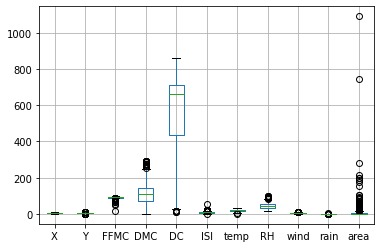

In [7]:
#Check boxplot to see whether the dataset must be normalized
dt.boxplot()

The various features have values in very different ranges, so the dataset must be normalized.

In [8]:
#Change months and days to numerical values before normalizing
c= {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
dt['month2'] = dt['month'].apply(lambda x: c[x])
dt = dt.drop(['month'], axis=1)

c= {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
dt['day2'] = dt['day'].apply(lambda x: c[x])
dt = dt.drop(['day'], axis=1)

In [9]:
dt.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month2,day2
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,5
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,2
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,6
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,5
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,7


## Single Validation

In [10]:
from sklearn.utils import shuffle
dt = pd.DataFrame(shuffle(dt))

In [29]:
# Treshold to separate training and test datasets
ths = dt.shape[0] * 2 // 3

In [12]:
ths

344

## Normalization

In [30]:
#We use the standard scaler as most features have decimal values

from sklearn.preprocessing import StandardScaler
nrm = StandardScaler()

#Normalize test dataset
nrm.fit(dt.iloc[:ths])

StandardScaler()

In [14]:
#Transform back to pandas dataframe
dt = pd.DataFrame(nrm.transform(dt),
                  columns=dt.columns,
                  index=dt.index)

In [15]:
dt.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month2,day2
6,1.444741,1.383277,0.298221,-0.400832,-0.222336,-0.178591,0.847242,-1.072594,-0.534455,-0.088364,-0.242035,0.274036,-1.621869
188,0.576635,-0.292242,-0.102827,-1.138518,-1.872008,-0.303714,-1.064262,-0.144284,-1.820138,-0.088364,-0.090573,-2.047849,0.803883
447,-0.725525,-0.292242,0.592322,-1.524626,-2.120149,0.113362,-1.843022,-0.577495,2.329111,-0.088364,-0.242035,-2.047849,-0.651568
453,-0.291472,0.545518,-0.477137,2.381972,1.027305,-0.783351,-0.338598,0.598364,-0.534455,-0.088364,-0.242035,0.274036,-0.166418
269,-0.291472,-0.292242,0.244748,0.598969,0.438020,1.030930,-0.037714,0.536477,-0.768216,-0.088364,-0.151976,0.274036,-1.136719


## Graphical Representation

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [33]:
#Apply PCA to training dataset with 2 PC (only features)

pca = PCA(n_components=2)
pca.fit(dt.iloc[:ths,:-1])

PCA(n_components=2)

In [34]:
#Define the transformed dataset Xp

Xp = pd.DataFrame(pca.transform(dt.iloc[:ths,:-1]))

In [35]:
#Add the class column ('area') to the transformed dataset

Y = pd.Series(dt.iloc[:ths,-1],name='area')
Y.index = range(ths)
Xp.loc[:,'area'] = Y

In [37]:
Xp.head()

,0,1,area
0,-0.261314,2.016672,-1.621869
1,2.641941,0.542655,0.803883
2,3.097634,0.192194,-0.651568
3,-0.990121,-0.758688,-0.166418
4,-0.945989,-0.498632,-1.136719


No handles with labels found to put in legend.


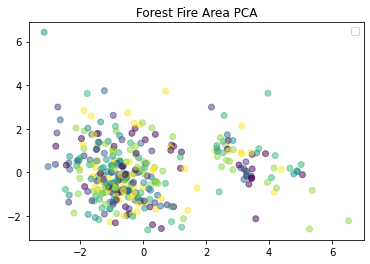

In [38]:
#Plot the dataset in PCA space

plt.figure()
plt.scatter(Xp[0], Xp[1], c=Xp['area'], alpha=0.5)
plt.legend()
plt.title("Forest Fire Area PCA")
plt.show()

From this graph, we can see that there is no clear relationship between the area of the forest fires and the principal components of the PCA analysis.

## Regression

We will analyse different regression methods (KNRegressor, SVM, MLP) through the $r^2$ score of each model.

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
#Define a generic regression function to use later with different regression models

def regression(clf):
  clf.fit(dt.iloc[:ths,:-1], dt.iloc[:ths,-1])
  preds = pd.Series(clf.predict(dt.iloc[ths:,:-1]),
                    name='preds')
  reals = pd.Series(dt.iloc[ths:,-1],name='reals')
  reals.index = preds.index
  print('R2:', r2_score(reals,preds))
  print('msqe:', mean_squared_error(reals,preds))

In [41]:
#Define a tuning function to look for the best parameters in the models

from sklearn.model_selection import GridSearchCV
def tuning(clf):
  clf.fit(dt.iloc[:ths,:-1], dt.iloc[:ths,-1])
  print('pars:', clf.best_params_)
  preds = pd.Series(clf.predict(dt.iloc[ths:,:-1]),
                    name='preds')
  reals = pd.Series(dt.iloc[ths:,-1],name='reals')
  reals.index = preds.index
  print('R2:', r2_score(reals,preds))
  print('msqe:', mean_squared_error(reals,preds))

### KNeighbors Regressor

In [25]:
#Fit a KNRegressor model with 3 neighbors

from sklearn.neighbors import KNeighborsRegressor
regression(KNeighborsRegressor(3))

R2: -0.2283494902380716
msqe: 1.2509273910444767


In [26]:
#Find the best parameters for the KNeighbors regressor (number of neighbors, weights) to improve r2

from sklearn.neighbors import KNeighborsRegressor
pgrid = {'n_neighbors': [1,3,5,7,11,17],
         'weights':['uniform','distance']}
tuning(GridSearchCV(KNeighborsRegressor(),
                    pgrid,cv=5,scoring='r2'))

pars: {'n_neighbors': 11, 'weights': 'distance'}
R2: 0.003195578235893226
msqe: 1.0151263664035057


We can see that with 11 neighbors and weighing by distance we obtain a better model, as the resulting $r^2$ for this model is higher than the one obtained with 3 neighbors.

### SVM Regressor

In [42]:
from sklearn.svm import SVR
regression(SVR())

R2: -0.1429713178337051
msqe: 1.1639799096422252


###MLP Regressor



In [43]:
from sklearn.neural_network import MLPRegressor
regression(MLPRegressor(hidden_layer_sizes=(10,), max_iter=500))

R2: -0.013506247574550434
msqe: 1.0321351831553964


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Conclusion

As we can see the results obtained from KNRegressor with 11 neighbors have slightly higher $r^2$ and a lower msqe than both the SVM and MLP models analyzed. However, the values obtained for $r^2$ are low in all three cases, which means that neither of these models are able to accurately predict the area of forest fires from the information given in the dataset.

It is important to note that all three models give considerably different results whenever the dataset is shuffled. This also happens because neither model is able to accurately predict the area from the given features, so whenever a new training dataset is defined the results of the models differ from the previous ones.

We can conclude that more information is needed apart from the weather to be able to predict the area of forest fires, especially data related to human activity as this is one of the main reasons for forest fires to occur.